In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dataset1 = pd.read_csv('/content/drive/MyDrive/Tweet Sentiment/Tweets1.csv')

In [ ]:
dataset1.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
dataset1.shape

(98392, 2)

In [ ]:
dataset1.drop(dataset1[dataset1['clean_text'].isna()].index, inplace=True)
dataset1.drop(dataset1[dataset1['category'].isna()].index, inplace=True)

In [ ]:
dataset1.shape

(98390, 2)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from torchtext.data.utils import get_tokenizer
import re
from string import punctuation

# Define the preprocessor function
def preProcessor(Tweet):
    Tweet = re.sub(r'(http|ftp|https):\/\/([\w\-_]+(?:(?:\.[\w\-_]+)+))([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?', ' ', Tweet)
    Tweet = re.sub(r'[' + punctuation + ']', ' ', Tweet)
    Tweet = re.sub(r'#(\w+)', ' ', Tweet)
    Tweet = re.sub(r'@(\w+)', ' ', Tweet)
    return Tweet

# Initialize torchtext tokenizer
tokenizer = get_tokenizer("basic_english")

# Define the tokenization function
def tokenize(text):
    return tokenizer(text)

# Initialize CountVectorizer with custom tokenizer
cv = CountVectorizer(lowercase=True,
                     tokenizer=tokenize,
                     stop_words='english',
                     ngram_range=(1, 1))

# Use the CountVectorizer to transform the data
train_data = cv.fit_transform(dataset1['clean_text'].values.astype('U'))


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
import joblib

model = None

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, dataset1['category'], test_size=0.3, random_state=42)

#Normalize Features
norm = Normalizer(norm='l2')
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

#Experiment with regularization parameters using GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10]}
clf = GridSearchCV(svm.LinearSVC(penalty="l2", dual=False), param_grid, cv=5)
clf.fit(X_train_norm, y_train)

#Print best parameters and score
print("Best parameters:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)

model = clf.best_estimator_

#Evaluate on the testing set using the best model
pred = clf.predict(X_test_norm)
test_accuracy = accuracy_score(y_test, pred)
print("Test accuracy:", test_accuracy)

model_path="sentiment_analysis_model.pkl"
joblib.dump(model, model_path)
print("model saved successfully to:{model_path}")

Best parameters: {'C': 1}
Best cross-validation score: 0.8557636220902793
Test accuracy: 0.8578785106887556
model saved successfully to:{model_path}


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 5971  1558  1216]
 [  939 10872  1539]
 [ 1057  2193 12416]]
Normalized confusion matrix
[[0.68 0.18 0.14]
 [0.07 0.81 0.12]
 [0.07 0.14 0.79]]


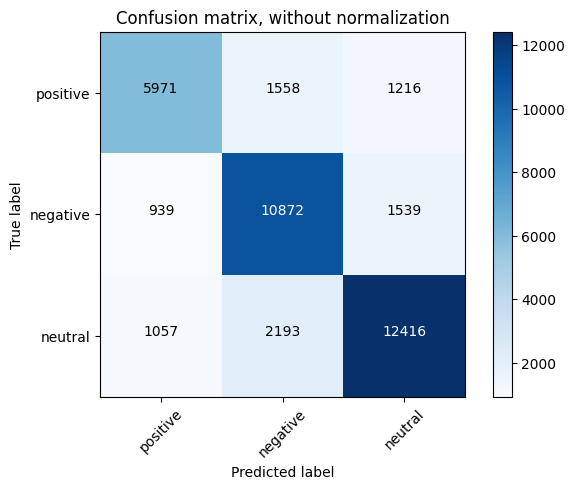

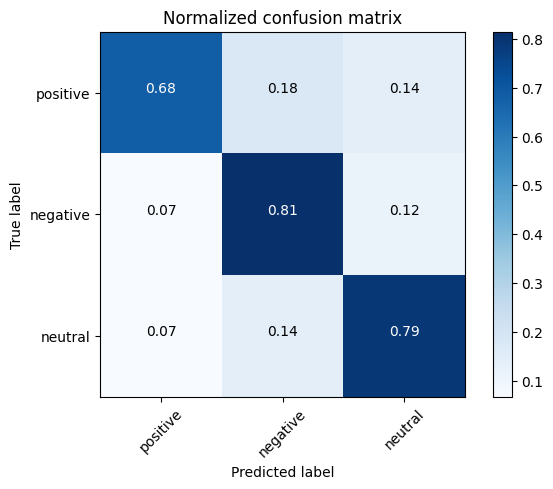

Confusion matrix, without normalization
[[ 5971  1558  1216]
 [  939 10872  1539]
 [ 1057  2193 12416]]
Normalized confusion matrix
[[0.68 0.18 0.14]
 [0.07 0.81 0.12]
 [0.07 0.14 0.79]]


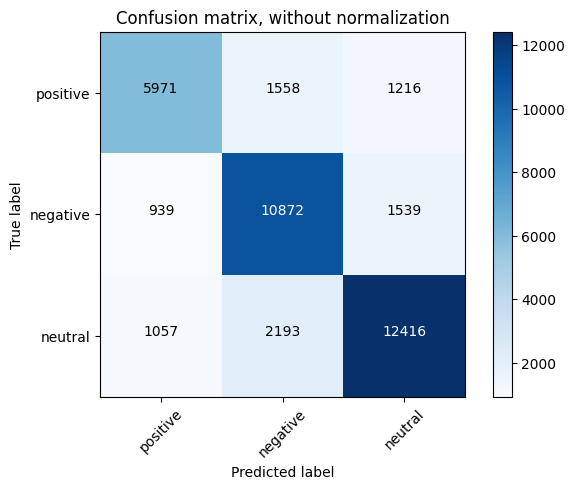

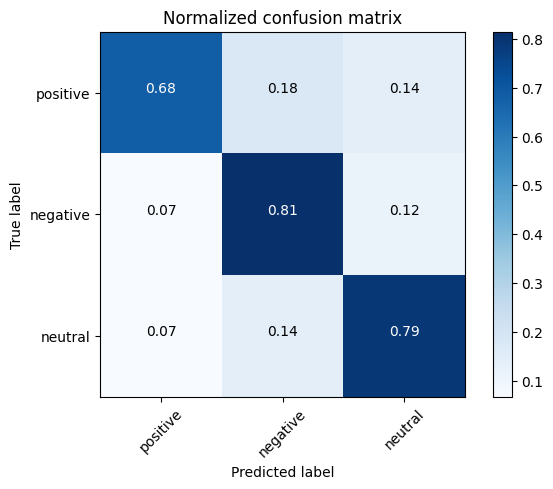

In [ ]:
from sklearn.svm import LinearSVC
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
clf=LinearSVC(penalty='l2',dual=False)
clf.fit(X_train, y_train)
clf.fit(X_train, y_train)

pred=clf.predict(X_test)
metrics.accuracy_score(y_test, pred)
metrics.accuracy_score(y_test, pred)
cnf_matrix = confusion_matrix(y_test,pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative",'neutral'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()